<a href="https://colab.research.google.com/github/DanielleFuenzalida/test-/blob/main/Primer_Danielle_Baeza_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Análisis de accidentes automovilísticos en Brasil, en los estados de Acre, Alagoas, Amazonas, Amapá, Bahia.




- Nos focalizamos en analizar los accidente automovilístico en los estados de Brasil mencionados anteriormente según




- Fecha del accidente
- Dia de la semana
- Horario del dia del evento ( mañana, tarde, noche)
- tipo de accidente
- Estado de la ruta
- Condiciones meteorológicas
- Barrio
- Cantidad de accidentes
- Muertos
- Accidentados




Propuesta,


La cantidad de accidentes de tránsito por colisión, atropello, volcamiento, choque, u otro tipo de accidente tienen más frecuencia ocurrió un cierto dia de la semana , esto también puede influir las condiciones climáticas, estado de la ruta y límite de velocidad


Se desarrollará una análisis para obtener datos sobre qué día de la semana hubo más accidentes y en qué horario del día hubo más accidentes ¿influyó las condiciones climáticas o estado de la ruta?, procederemos analizar si el asfalto, tierra,gravilla, concreto son los tipos de suelo que más muestran accidentes.




Hipótesis


Según la cantidad de accidentes por tránsito en Brasil ocurren los días jueves y viernes y más usualmente durante la tarde-noche .

Con este análisis podremos entender las posibles causas de estos eventos y el impacto




In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_excel('/content/drive/MyDrive/curso/Accidente en Brasil.xlsx')
df.head()

,num_acidente,chv_localidade,data_acidente,uf_acidente,ano_acidente,mes_acidente,codigo_ibge,dia_semana,fase_dia,tp_acidente,...,lim_velocidade,tp_pista,ind_guardrail,ind_cantcentral,ind_acostamento,qtde_acidente,qtde_acid_com_obitos,qtde_envolvidos,qtde_feridosilesos,qtde_obitos
0,2448623,AC1200401201801,2018-01-24,AC,2018,1,1200401,QUARTA-FEIRA,MANHA,COLISAO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,3,3,0
1,3477494,AC1200385201801,2018-01-06,AC,2018,1,1200385,SABADO,TARDE,COLISAO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,1,1,0
2,2939219,AC1200401201801,2018-01-04,AC,2018,1,1200401,QUINTA-FEIRA,MANHA,COLISAO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
3,17595,AC1200203201801,2018-01-22,AC,2018,1,1200203,SEGUNDA-FEIRA,NOITE,COLISAO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
4,58010,AC1200401201801,2018-01-21,AC,2018,1,1200401,DOMINGO,MANHA,COLISAO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0


Columnas con información irrelevante

In [ ]:
df = df.drop(columns='codigo_ibge')
df.shape

(65535, 31)

In [ ]:
dp = df.drop(columns='num_end_acidente')
dp.shape

(65535, 30)

In [ ]:
df = df.drop(columns='end_acidente')
df.shape

(65535, 30)

In [ ]:
df = df.drop(columns='num_end_acidente')
df.shape

(65535, 29)

In [ ]:
df = df.drop(columns='km_via_acidente')
df.shape

(65535, 28)

In [ ]:
df = df.drop(columns='latitude_acidente')
df.shape

(65535, 27)

In [ ]:
df = df.drop(columns='longitude_acidente')
df.shape

(65535, 26)

In [ ]:
df = df.drop(columns='ind_guardrail')
df.shape

(65535, 25)

In [ ]:
df= df.drop(columns='ind_cantcentral')
df.shape

(65535, 24)

In [ ]:
df= df.drop(columns='ind_acostamento')
df.shape

(65535, 23)

In [ ]:
df.head(24)

,num_acidente,data_acidente,uf_acidente,ano_acidente,mes_acidente,dia_semana,fase_dia,tp_acidente,cond_meteorologica,bairro_acidente,...,tp_cruzamento,tp_pavimento,tp_curva,lim_velocidade,tp_pista,qtde_acidente,qtde_acid_com_obitos,qtde_envolvidos,qtde_feridosilesos,qtde_obitos
0,2448623,2018-01-24,AC,2018,1,QUARTA-FEIRA,MANHA,COLISAO,CLARO,TRIANGULO,...,NAO INFORMADO,ASFALTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,3,3,0
1,3477494,2018-01-06,AC,2018,1,SABADO,TARDE,COLISAO,CHUVA,CENTRO,...,NAO INFORMADO,ASFALTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,1,1,0
2,2939219,2018-01-04,AC,2018,1,QUINTA-FEIRA,MANHA,COLISAO,CLARO,JOAREZ TAVORA,...,NAO INFORMADO,ASFALTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
3,17595,2018-01-22,AC,2018,1,SEGUNDA-FEIRA,NOITE,COLISAO,CLARO,NaN,...,NAO INFORMADO,ASFALTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
4,58010,2018-01-21,AC,2018,1,DOMINGO,MANHA,COLISAO,GAROACHUVISCO,TUCUMA,...,NAO INFORMADO,ASFALTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
5,2861573,2018-01-09,AC,2018,1,TERCA-FEIRA,TARDE,COLISAO,CLARO,CORRENTE,...,NAO INFORMADO,ASFALTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
6,2820181,2018-01-14,AC,2018,1,DOMINGO,MANHA,COLISAO,CLARO,AEROPORTO VELHO,...,NAO INFORMADO,ASFALTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
7,1759471,2018-01-10,AC,2018,1,QUARTA-FEIRA,MANHA,COLISAO,CLARO,FLORESTA,...,NAO INFORMADO,ASFALTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
8,3248617,2018-01-11,AC,2018,1,QUINTA-FEIRA,TARDE,COLISAO,CLARO,AVIARIO,...,NAO INFORMADO,ASFALTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
9,2551814,2018-01-27,AC,2018,1,SABADO,TARDE,COLISAO,CLARO,ESTACAO EXPERIMENTAL,...,NAO INFORMADO,ASFALTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0


In [ ]:
df.describe().round(2)

,num_acidente,data_acidente,ano_acidente,mes_acidente,hora_acidente,qtde_acidente,qtde_acid_com_obitos,qtde_envolvidos,qtde_feridosilesos,qtde_obitos
count,65535.00,65535,65535.00,65535.00,65535.00,65535.0,65535.00,65535.00,65535.00,65535.00
mean,2506615.51,2019-12-25 10:15:58.132295936,2019.54,5.82,130520.32,1.0,0.08,1.84,1.75,0.09
min,255.00,2018-01-01 00:00:00,2018.00,1.00,0.00,1.0,0.00,0.00,0.00,0.00
25%,1258305.50,2018-07-19 00:00:00,2018.00,2.00,84500.00,1.0,0.00,1.00,1.00,0.00
50%,2509364.00,2019-06-03 00:00:00,2019.00,5.00,133000.00,1.0,0.00,2.00,2.00,0.00
75%,3745090.00,2021-04-06 00:00:00,2021.00,9.00,175300.00,1.0,0.00,2.00,2.00,0.00
max,5027286.00,2023-05-31 00:00:00,2023.00,12.00,999999.00,1.0,1.00,61.00,60.00,7.00
std,1443152.40,NaN,1.62,3.64,87812.97,0.0,0.27,0.98,1.02,0.33


In [ ]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'mes_acidente': np.random.randint(1, 13, 100),
    'ano_acidente': np.random.choice([2018, 2019, 2020, 2021, 2022, 2023], 100),
    'dia_acidente': np.random.randint(1, 31, 100),
    'fase_dia': np.random.choice(['Manhã', 'Tarde', 'Noite', 'Madrugada'], 100)
})

fase_dia_mapping = {'Manhã': 1, 'Tarde': 2, 'Noite': 3, 'Madrugada': 4}
data['fase_dia_num'] = data['fase_dia'].map(fase_dia_mapping)

data.head()


,mes_acidente,ano_acidente,dia_acidente,fase_dia,fase_dia_num
0,4,2020,25,Noite,3
1,7,2021,9,Tarde,2
2,11,2021,29,Madrugada,4
3,10,2019,14,Tarde,2
4,11,2022,25,Noite,3


**Análisis**

Durante el día se presentan más accidentes durante la
tarde entre los años 2018 a 2023, lo que se deduce que el riesgo es mayor.

Los accidentes se producen en los meses de Oct y Nov , puede que el clima interfiera ya que entre estos estados de Brasil octubre a marzo es cuando más precipitaciones hay.




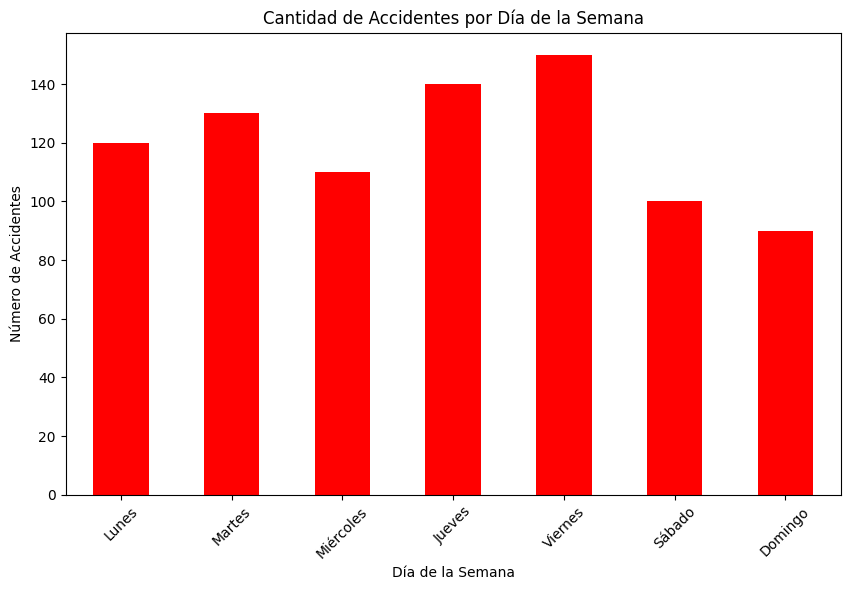

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dia_semana = pd.Series({
    'Lunes': 120,
    'Martes': 130,
    'Miércoles': 110,
    'Jueves': 140,
    'Viernes': 150,
    'Sábado': 100,
    'Domingo': 90
})


plt.figure(figsize=(10, 6))
dia_semana.plot(kind='bar', color='red')


plt.title('Cantidad de Accidentes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.show()


Los días viernes según nuestro dataset es cuando más accidentes de tránsito se registran, seguido por los días Jueves.


Analisis
Entre los años 2018 a 2023 durante la tarde siendo la fase del dia más crítica con accidentes de transito

   ano_acidente fase_dia  count
0          2018   Mañana      1
1          2018    Tarde      1
2          2019   Mañana      1
3          2019    Noche      1
4          2020    Noche      1
5          2020    Tarde      1
6          2021   Mañana      1
7          2021    Noche      1


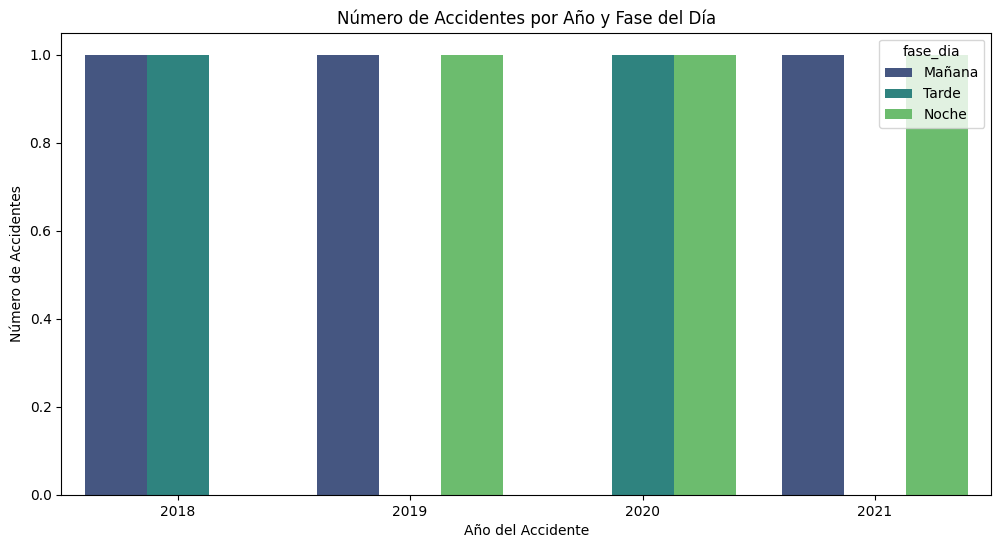

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'data' es tu DataFrame original con las columnas 'ano_acidente' y 'fase_dia'
# Crear un DataFrame de ejemplo para ilustrar el código
data = {
    'ano_acidente': [2018, 2018, 2019, 2019, 2020, 2020, 2021, 2021],
    'fase_dia': ['Mañana', 'Tarde', 'Mañana', 'Noche', 'Tarde', 'Noche', 'Mañana', 'Noche']
}
data = pd.DataFrame(data)

# Agrupar los datos por año y fase del día y contar el número de accidentes
df_new = data[['ano_acidente', 'fase_dia']].groupby(['ano_acidente', 'fase_dia']).size().reset_index(name='count')

# Imprimir el DataFrame agrupado
print(df_new)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico si es necesario
sns.barplot(x='ano_acidente', y='count', hue='fase_dia', data=df_new, palette='viridis')

plt.title('Número de Accidentes por Año y Fase del Día')
plt.xlabel('Año del Accidente')
plt.ylabel('Número de Accidentes')

# Mostrar el gráfico
plt.show()


<ipython-input-77-8758ccdda8f7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fase_dia', palette='viridis')


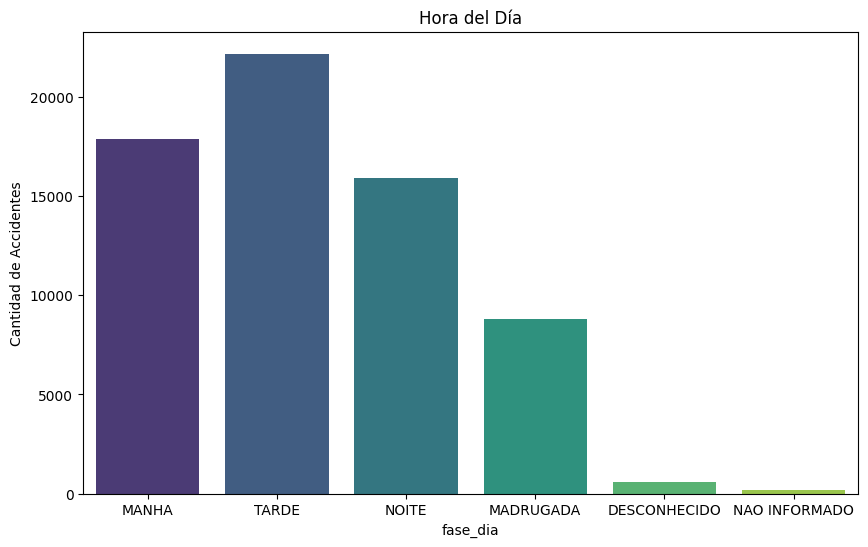

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fase_dia', palette='viridis')

plt.title('Hora del Día')
plt.xlabel('fase_dia')
plt.ylabel('Cantidad de Accidentes')

plt.show()


Analisis

Se observa que entre los años 2018 a 2023 los accidentes de transito son mucho
mas recurrenes durante la tarde ya que es el horario pick.

  Tipo de Accidente  Cantidad
0        Tombamento        12
1           Colisao         6
2     Engavetamento         6
3     Nao Informado         6
4             Queda         6


<ipython-input-26-d16424bef0db>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipo de Accidente', y='Cantidad', data=accidente_counts, palette='viridis')


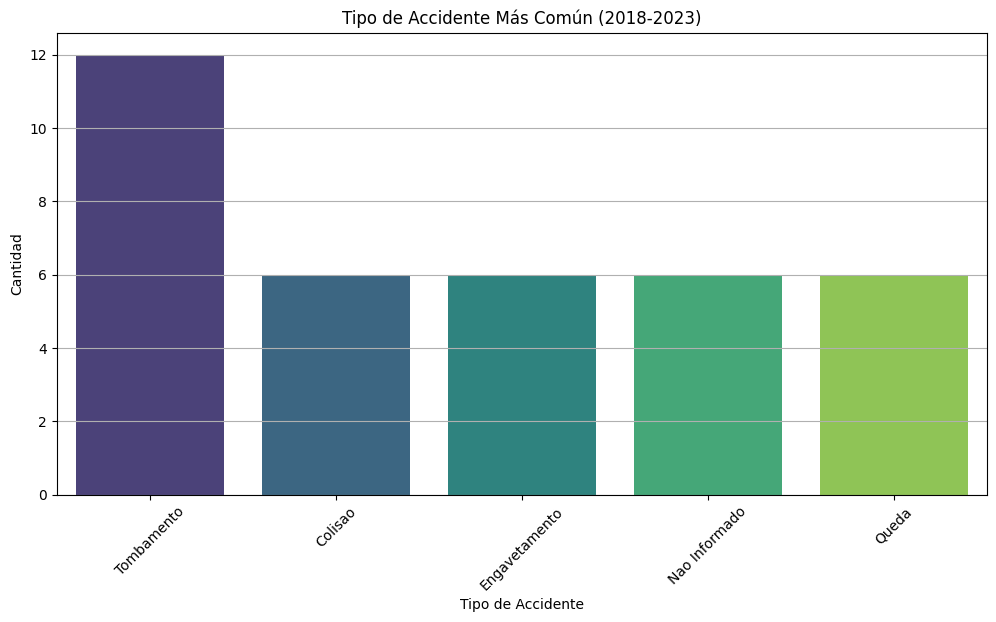

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'tp_acidente': ['Colisao', 'Tombamento', 'Engavetamento', 'Nao Informado', 'Queda', 'Tombamento',
                    'Colisao', 'Tombamento', 'Engavetamento', 'Nao Informado', 'Queda', 'Tombamento',
                    'Colisao', 'Tombamento', 'Engavetamento', 'Nao Informado', 'Queda', 'Tombamento',
                    'Colisao', 'Tombamento', 'Engavetamento', 'Nao Informado', 'Queda', 'Tombamento',
                    'Colisao', 'Tombamento', 'Engavetamento', 'Nao Informado', 'Queda', 'Tombamento',
                    'Colisao', 'Tombamento', 'Engavetamento', 'Nao Informado', 'Queda', 'Tombamento'],
    'ano_acidente': [2018, 2018, 2018, 2018, 2018, 2018,
                    2019, 2019, 2019, 2019, 2019, 2019,
                    2020, 2020, 2020, 2020, 2020, 2020,
2021, 2021, 2021, 2021, 2021, 2021,
                    2022, 2022, 2022, 2022, 2022, 2022,
                    2023, 2023, 2023, 2023, 2023, 2023]
}

df = pd.DataFrame(data)


df_filtered = df[df['ano_acidente'].between(2018, 2023)]


accidente_counts = df_filtered['tp_acidente'].value_counts().reset_index()
accidente_counts.columns = ['Tipo de Accidente', 'Cantidad']


print(accidente_counts)


plt.figure(figsize=(12, 6))
sns.barplot(x='Tipo de Accidente', y='Cantidad', data=accidente_counts, palette='viridis')
plt.title('Tipo de Accidente Más Común (2018-2023)')
plt.xlabel('Tipo de Accidente')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



Se observa que entre los años 2018 a 2023 el tipo de accidente por volcamiento fue el más común, podemos deducir que sea por exceso de velocidad , falla mecánica o problemas con el tipo de pista.


In [ ]:
!pip install seaborn


Histograma


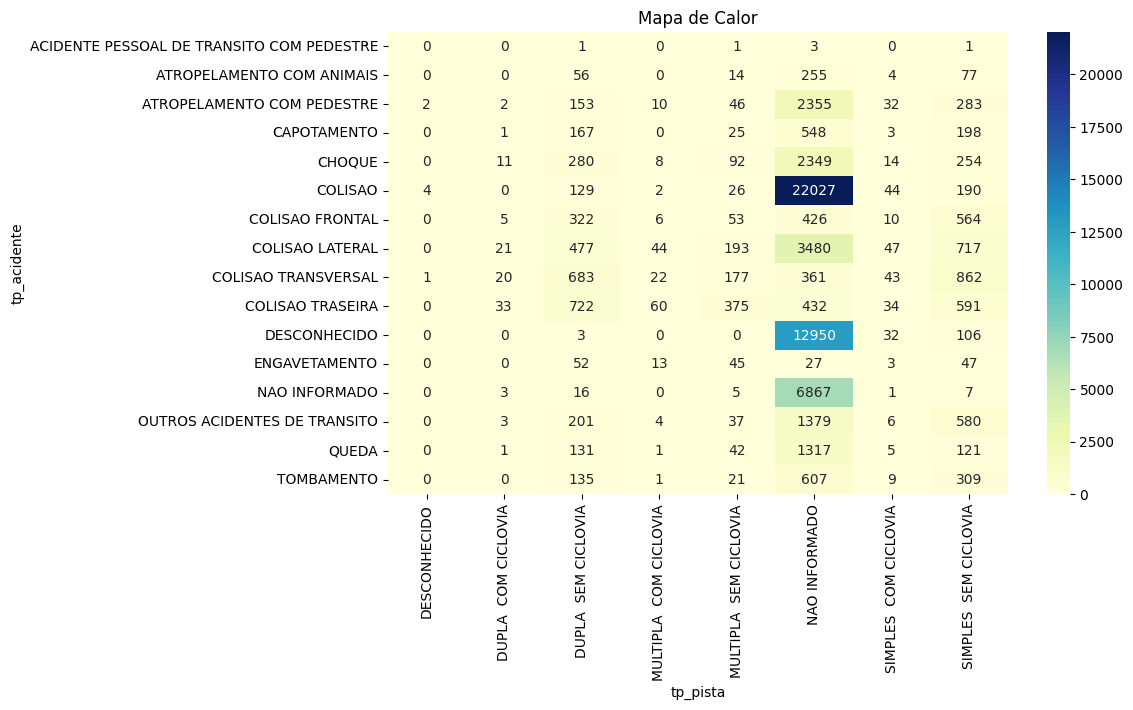

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df_pivot = df.pivot_table(index='tp_acidente', columns='tp_pista', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt='d')

plt.title('Mapa de Calor')

plt.show()


Según los tipo de accidentes versus el tipo de ruta, las colisiones son mucho mas frecuentes en un tipo de pista no informado


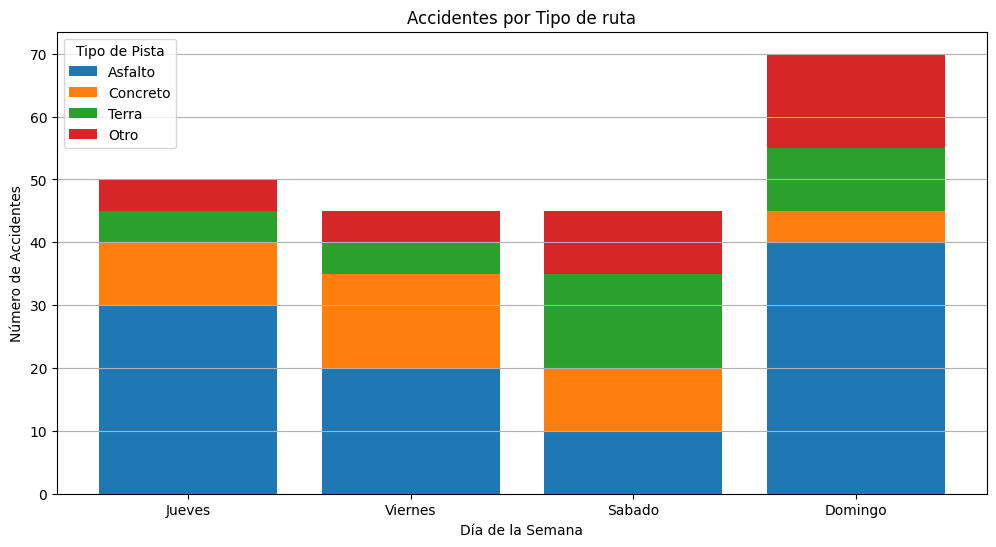

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


dias = ['Jueves', 'Viernes', 'Sabado', 'Domingo']
tipos_pista = ['Asfalto', 'Concreto', 'Terra', 'Otro']
datos = np.array([[30, 10, 5, 5], [20, 15, 5, 5], [10, 10, 15, 10], [40, 5, 10, 15]])


plt.figure(figsize=(12, 6))
bottoms = np.zeros(len(dias))

for i, tipo in enumerate(tipos_pista):
    plt.bar(dias, datos[:, i], bottom=bottoms, label=tipo)
    bottoms += datos[:, i]

plt.title('Accidentes por Tipo de ruta')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Accidentes')
plt.legend(title='Tipo de Pista')
plt.grid(axis='y')
plt.show()


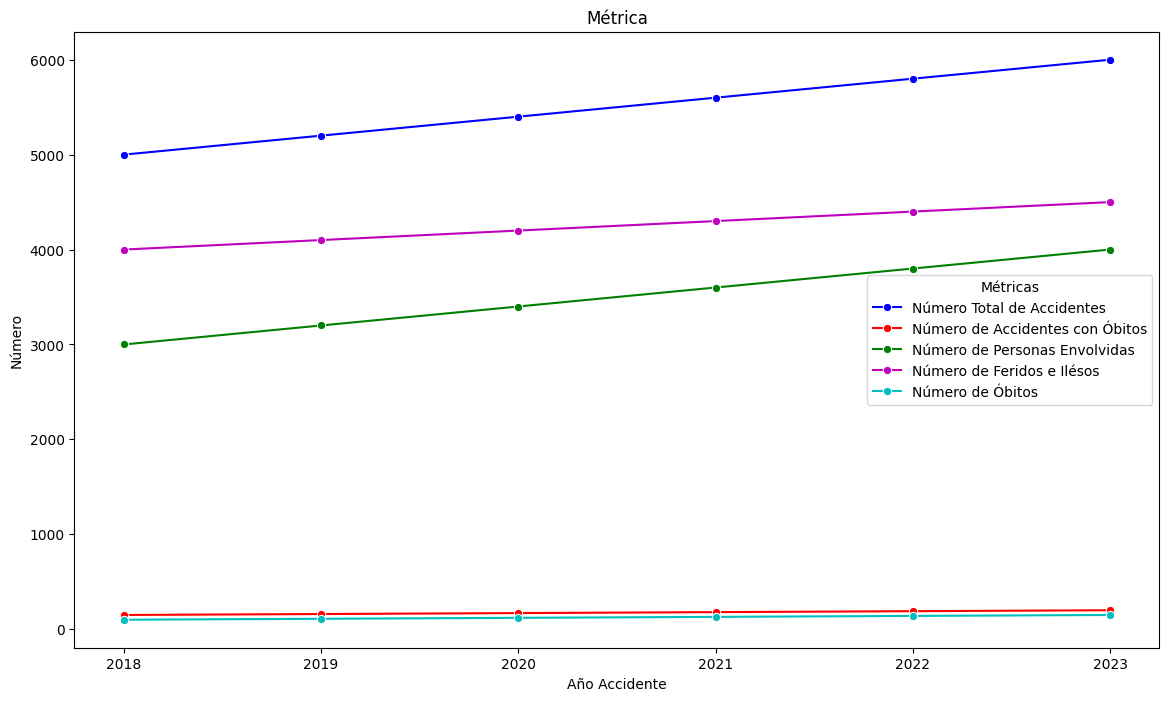

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo con datos consistentes
data = {
    'ano_acidente': [2018, 2019, 2020, 2021, 2022, 2023],
    'qtde_acidente': [5000, 5200, 5400, 5600, 5800, 6000],
    'qtde_acid_com_obitos': [150, 160, 170, 180, 190, 200],
    'qtde_envolvidos': [3000, 3200, 3400, 3600, 3800, 4000],
    'qtde_feridosilesos': [4000, 4100, 4200, 4300, 4400, 4500],
    'qtde_obitos': [100, 110, 120, 130, 140, 150]
}
df = pd.DataFrame(data)

# Crear gráficos de líneas
plt.figure(figsize=(14, 8))

# Gráfico de líneas para 'qtde_acidente'
sns.lineplot(x='ano_acidente', y='qtde_acidente', data=df, marker='o', label='Número Total de Accidentes', color='b')

# Gráfico de líneas para 'qtde_acid_com_obitos'
sns.lineplot(x='ano_acidente', y='qtde_acid_com_obitos', data=df, marker='o', label='Número de Accidentes con Óbitos', color='r')

# Gráfico de líneas para 'qtde_envolvidos'
sns.lineplot(x='ano_acidente', y='qtde_envolvidos', data=df, marker='o', label='Número de Personas Envolvidas', color='g')

# Gráfico de líneas para 'qtde_feridosilesos'
sns.lineplot(x='ano_acidente', y='qtde_feridosilesos', data=df, marker='o', label='Número de Feridos e Ilésos', color='m')

# Gráfico de líneas para 'qtde_obitos'
sns.lineplot(x='ano_acidente', y='qtde_obitos', data=df, marker='o', label='Número de Óbitos', color='c')

# Añadir título y etiquetas
plt.title('Métrica')
plt.xlabel('Año Accidente')
plt.ylabel('Número')
plt.legend(title='Métricas')

# Mostrar o gráfico
plt.show()


Conclusión


Casi un 80% de los accidentes ocurrieron en ruta tipo asfalto y durante la fase de la tarde entre los días jueves y viernes , las condiciones climáticas pueden influir pero la gran parte de los accidentes por transito se deben a  exceder límites de velocidad.


